### Convolutional Nets in `PyTorch`

- [Attendance](https://forms.gle/3U9Pv7mxThFgPYSP6)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10, ImageFolder
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

Signing up for WRDS:

NYU faculty, administrators, staff, and students may apply for a WRDS account. Non-PhD students can request a temporary Research Assistant account when working with faculty.

- Visit [Wharton Research Database Services](https://wrds-www.wharton.upenn.edu/)

- Click the Register button.

- Complete the form, read the Terms of Use, and submit.

- The NYU Representative for WRDS will review your application and affiliation.

- Upon approval, WRDS will email instructions for setting your password.

### PROBLEM

Below, build a model with the following:

- A Linear layer with 100 neurons
- A ReLU activation on this layer
- A Linear layer with another 100 neurons
- A ReLU activation on this layer
- A Linear output layer with 10 neurons

Use the `optim.SGD` to optimize the parameters of the model.

Use `nn.CrossEntropyLoss` as your loss function for multiclass classification.

In [19]:
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, Normalize, ToTensor

In [20]:
train = MNIST(root = '.', download = True)

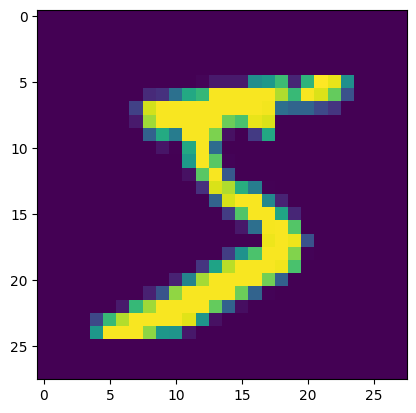

In [21]:
plt.imshow(train[0][0])

In [22]:
type(train[0][0])

PIL.Image.Image

In [23]:
train = MNIST(root = '.', download = True, transform=ToTensor())

In [24]:
type(train[0][0])

torch.Tensor

In [25]:
transforms = Compose([ToTensor(), Normalize((0.5,), (0.5))])

In [26]:
train = MNIST(root = '.', download = True, transform=transforms)

In [27]:
trainloader = DataLoader(train, batch_size=32)

In [28]:
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(28*28, 100),
                      nn.ReLU(),
                      nn.Linear(100, 100),
                      nn.ReLU(),
                      nn.Linear(100, 10))
                      

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [30]:
from tqdm import tqdm

In [31]:
def train_function(model, loader, epochs, optimizer, loss_fn, losses = []):
    '''
    The function trains a pytorch model given a model,
    number of training epochs, optimizer, and loss function.
    It returns a list of losses from training.
    '''
    for epoch in tqdm(range(epochs)):
        for X,Y in loader:
            yhat = model(X)
            loss = loss_fn(yhat, Y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        losses.append(loss.item())
    return losses

In [32]:
losses = train_function(model, trainloader, 20, optimizer, loss_fn)

100%|███████████████████████████████████████████| 20/20 [03:24<00:00, 10.24s/it]


In [33]:
test = MNIST(root = '.', train = False, transform = transforms)
testloader = DataLoader(test, batch_size = 32)

In [38]:
total = 0
correct = 0
for x,y in testloader:
    yhat = model(x)
    preds = torch.argmax(yhat, dim = 1)
    correct += (y == preds).sum()
    total += len(y)
    #print(correct/total)
print(correct/total)

tensor(0.9749)


#### Convolutions

<center>
   <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/790px-Typical_cnn.png />
</center>

In [40]:
from IPython.display import YouTubeVideo

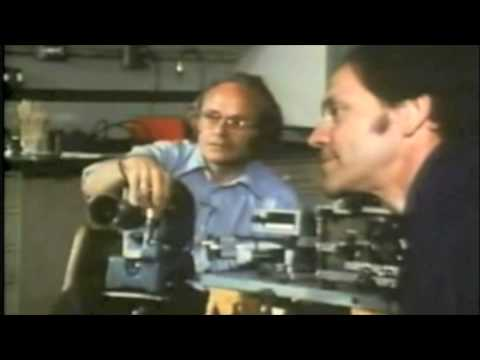

In [41]:
YouTubeVideo(id = 'IOHayh06LJ4')

In [ ]:
np.random.seed(22)
im = np.random.randint(low = 1, high = 10, size = 25).reshape(5, 5)
im

array([[6, 5, 1, 5, 7],
       [7, 5, 9, 5, 3],
       [9, 8, 3, 9, 9],
       [6, 5, 3, 3, 2],
       [7, 4, 4, 3, 8]])

In [ ]:
#three by three filter
f = np.zeros((3, 3))
f

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
f[:, 0] = 1
f[:, -1] = -1
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

<Axes: >

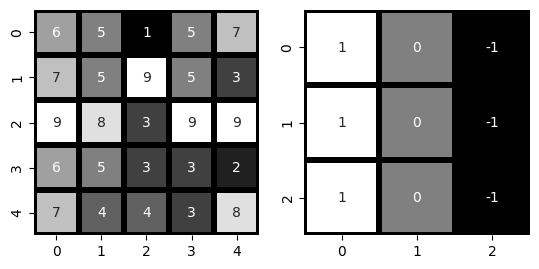

In [ ]:
#side by side images
import seaborn as sns
fig, ax = plt.subplots(1, 2)

sns.heatmap(im, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[0])


sns.heatmap(f, annot = True, cmap = 'gray', cbar = False, square = True,
           linewidth = 4, linecolor = 'black', ax = ax[1])


In [ ]:
#select upper left corner of image
im[:3, :3]

array([[6, 5, 1],
       [7, 5, 9],
       [9, 8, 3]])

In [ ]:
#convolve
np.sum(im[:3, :3]*f)

np.float64(9.0)

In [ ]:
#What is this doing?
output = np.zeros((3, 3))
for row in range(3):
    for col in range(3):
        output[row, col] = np.sum(f*im[row: row + 3, col: col + 3])

In [ ]:
#examine output
output

array([[ 9., -1., -6.],
       [ 7.,  1.,  1.],
       [12.,  2., -9.]])

In [ ]:
#10 by 10 grid
im2 = np.zeros((10, 10))
im2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#make first half 10
im2[:, :5] = 10

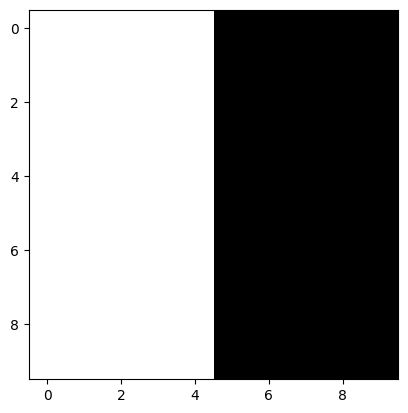

In [ ]:
#take a look
plt.imshow(im2, cmap = 'gray')

In [ ]:
#convolutions
output = np.zeros((8, 8))
for row in range(8):
    for col in range(8):
        output[row, col] = np.sum(f * im2[row: row + 3, col: col + 3])

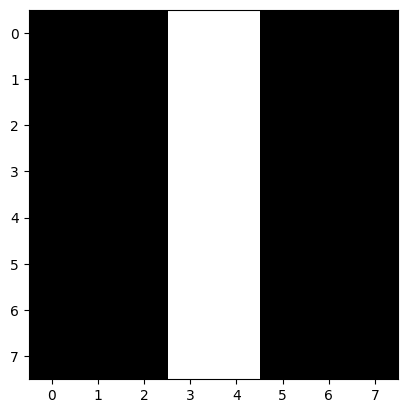

In [ ]:
#take a look at result
plt.imshow(output, cmap = 'gray')

In [ ]:
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

In [ ]:
f.T

array([[ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1., -1., -1.]])

### Max Pooling

<center>
<img src = https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png />
</center>

#### Fashion Images

In [ ]:
from torchvision.datasets import FashionMNIST

In [ ]:
train = FashionMNIST(root = '.', download = True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 26.4MB/s]


In [ ]:
train[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

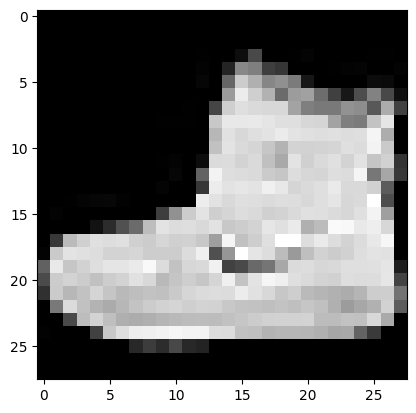

In [ ]:
plt.imshow(train[0][0], cmap = 'gray')

In [ ]:
from torchvision.transforms import ToTensor

In [ ]:
train = FashionMNIST(root = '.', download = True, transform = ToTensor())

In [ ]:
train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
#train[0]

#### Basic Convolution Example

In [ ]:
conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3)

In [ ]:
output = conv(train[0][0])

In [ ]:
output.shape

torch.Size([1, 26, 26])

In [ ]:
conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3, padding = 1)

In [ ]:
output = conv(train[0][0])

In [ ]:
output.shape

torch.Size([1, 28, 28])

In [ ]:
pool = nn.MaxPool2d(kernel_size = 2)

In [ ]:
pool(output).shape

torch.Size([1, 14, 14])

In [ ]:
model = nn.Sequential(nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3, padding = 1),
                      nn.MaxPool2d(kernel_size = 2), #28x28 --> 14x14
                      nn.Flatten(),
                      nn.Linear(in_features = 14*14, out_features = 10))

In [ ]:
conv.weight

Parameter containing:
tensor([[[[-0.2480,  0.0900,  0.1416],
          [-0.3076,  0.3215,  0.1049],
          [ 0.2696,  0.0261,  0.2284]]]], requires_grad=True)

In [ ]:
model(train[0][0])

tensor([[-0.0385, -0.0705, -0.0104, -0.0040,  0.0412,  0.0383,  0.0481,  0.0142,
         -0.1165,  0.0316]], grad_fn=<AddmmBackward0>)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
trainset = CIFAR10(root = '.', download = True)

100%|██████████| 170M/170M [00:06<00:00, 26.5MB/s]


In [ ]:
type(trainset[0][0])

PIL.Image.Image

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Resize((32, 32))
    transforms.Normalize(mean = (0.5, 0.5, 0.5),
                         std = (0.5, 0.5, 0.5))
])

In [ ]:
trainset = CIFAR10(root = '.', download = True, transform=transform)

In [ ]:
trainloader = DataLoader(trainset, batch_size = 24)

In [ ]:
testset = CIFAR10('.', train = False, transform=transform)

In [ ]:
test_loader = DataLoader(testset, batch_size = 24, shuffle = False)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# get a random training image
im, label = trainloader.dataset[0]

In [ ]:
#examine shape
im.shape

torch.Size([3, 32, 32])

In [ ]:
#size of one image
im[0].shape

torch.Size([32, 32])

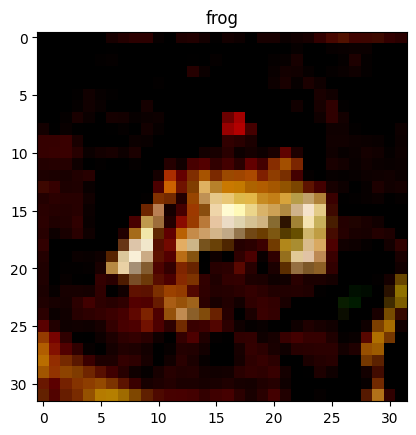

In [ ]:
#visualize image
plt.imshow(np.transpose(im, (1, 2, 0)))
plt.title(classes[int(label)]);

In [ ]:
im.flatten().shape

torch.Size([3072])

In [ ]:
simple_network = nn.Sequential(nn.Flatten(),
                               nn.Linear(3072, 100),
                               nn.ReLU(),
                               nn.Linear(100, 10))

In [ ]:
torch.argmax(simple_network(im.unsqueeze(0)))

tensor(6)

In [ ]:
classes[6]

'frog'

### Define Convolutional Neural Network

In [ ]:
nn.Conv2d?

$$\text{INPUT} = (C_{in}, H_{in}, W_{in})$$

$$\text{OUTPUT} = (C_{out}, H_{out}, W_{out})$$

$$H_{out} = \left\lfloor\frac{H_{in}  + 2 \times \text{padding}[0] - \text{dilation}[0]
                    \times (\text{kernel\_size}[0] - 1) - 1}{\text{stride}[0]} + 1\right\rfloor$$

$$W_{out} = \left\lfloor\frac{W_{in}  + 2 \times \text{padding}[1] - \text{dilation}[1]
                    \times (\text{kernel\_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor$$

In [ ]:
#example conv2d
layer_1 = nn.Conv2d(in_channels = 3,
                    out_channels = 16,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1)

In [ ]:
#data through
x = layer_1(im)

In [ ]:
#shape?
x.shape

torch.Size([16, 32, 32])

In [ ]:
#pool and examine
pool_1 = nn.MaxPool2d(2)
x = pool_1(x)
x.shape

torch.Size([16, 16, 16])

In [ ]:
#convolve again
conv_2 = nn.Conv2d(in_channels = 16,
                   out_channels = 8,
                   kernel_size = 3,
                   stride = 1,
                   padding = 1)
x = conv_2(x)
x.shape

torch.Size([8, 16, 16])

In [ ]:
# pool again
x = pool_1(x)
x.shape

torch.Size([8, 8, 8])

In [ ]:
#flatten
f = nn.Flatten()
x = f(x)
x.shape

torch.Size([8, 64])

In [ ]:
##pass through linear layer
linear_1 = nn.Linear(64, 100)
x = linear_1(x)
x.shape

torch.Size([8, 100])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#relu as a class
relu = nn.ReLU()

In [ ]:
x = torch.randn(size = (10, 10))

In [ ]:
relu(x)

tensor([[0.0000, 0.0000, 0.8973, 1.2180, 0.0000, 0.0000, 0.7536, 0.0000, 0.0000,
         0.0000],
        [0.6570, 0.7137, 1.0359, 0.0000, 0.7127, 0.0000, 0.7430, 0.0000, 0.5737,
         0.3190],
        [0.3822, 0.0000, 0.4842, 0.0000, 0.1737, 0.7300, 0.0000, 0.0000, 0.0000,
         0.1710],
        [1.2221, 0.0000, 0.0000, 0.0000, 0.9968, 1.0862, 0.0000, 0.0000, 0.2737,
         0.0000],
        [0.1842, 0.0000, 1.1926, 0.0000, 0.0471, 0.0000, 1.1789, 0.5811, 0.0000,
         0.1607],
        [1.7338, 0.3445, 0.0000, 0.0000, 0.1874, 0.3278, 1.4844, 0.0000, 0.0000,
         0.0000],
        [0.8592, 0.0000, 0.0000, 0.0000, 1.0961, 0.2902, 0.0000, 0.0666, 0.0000,
         0.1511],
        [0.8878, 0.5948, 0.0000, 1.7385, 1.6824, 0.0000, 0.6603, 0.0000, 0.8147,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3797, 0.0000, 0.0000, 1.0713, 0.0000,
         0.4404],
        [0.0000, 0.0000, 0.9367, 0.0844, 0.1225, 0.4753, 0.7151, 1.0227, 1.3684,
         0.0000]])

In [ ]:
F.relu(x)

tensor([[0.0000, 0.0000, 0.8973, 1.2180, 0.0000, 0.0000, 0.7536, 0.0000, 0.0000,
         0.0000],
        [0.6570, 0.7137, 1.0359, 0.0000, 0.7127, 0.0000, 0.7430, 0.0000, 0.5737,
         0.3190],
        [0.3822, 0.0000, 0.4842, 0.0000, 0.1737, 0.7300, 0.0000, 0.0000, 0.0000,
         0.1710],
        [1.2221, 0.0000, 0.0000, 0.0000, 0.9968, 1.0862, 0.0000, 0.0000, 0.2737,
         0.0000],
        [0.1842, 0.0000, 1.1926, 0.0000, 0.0471, 0.0000, 1.1789, 0.5811, 0.0000,
         0.1607],
        [1.7338, 0.3445, 0.0000, 0.0000, 0.1874, 0.3278, 1.4844, 0.0000, 0.0000,
         0.0000],
        [0.8592, 0.0000, 0.0000, 0.0000, 1.0961, 0.2902, 0.0000, 0.0666, 0.0000,
         0.1511],
        [0.8878, 0.5948, 0.0000, 1.7385, 1.6824, 0.0000, 0.6603, 0.0000, 0.8147,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3797, 0.0000, 0.0000, 1.0713, 0.0000,
         0.4404],
        [0.0000, 0.0000, 0.9367, 0.0844, 0.1225, 0.4753, 0.7151, 1.0227, 1.3684,
         0.0000]])

In [ ]:
class CNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
    self.pool = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(16, 8, 3, padding = 1)
    self.flatten = nn.Flatten()
    self.linear_1 = nn.Linear(8*8*8, 100)
    self.linear_2 = nn.Linear(100, 50)
    self.linear_3 = nn.Linear(50, 10)
    self.activation = nn.ReLU()

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.flatten(x)
    shape_of_flattened = x.shape
    x = F.relu(self.linear_1(x))
    x = F.relu(self.linear_2(x))
    x = self.linear_3(x)
    return x



In [ ]:
import torch.optim as optim

In [ ]:
# instantiate
model = CNet()

In [ ]:
#criteria and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
#train briefly
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
device

'cuda'

In [ ]:
from tqdm import tqdm

In [ ]:
for epoch in tqdm(range(5)):
  loss = 0
  for i, data in enumerate(trainloader):
    #training loop
    inputs, labels = data
    #move batch to gpu
    inputs = inputs.to(device)
    labels = labels.to(device)
    #pass data through model
    output = model(inputs)
    #evaluate predictions
    loss = criterion(output, labels)
    #backprop
    optimizer.zero_grad()
    loss.backward()
    #step to less loss
    optimizer.step()
    loss += loss.item()
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

 20%|██        | 1/5 [00:17<01:09, 17.27s/it]

Epoch: 1, Loss: 4.950966835021973


 40%|████      | 2/5 [00:33<00:50, 16.90s/it]

Epoch: 2, Loss: 4.238133430480957


 60%|██████    | 3/5 [00:50<00:33, 16.59s/it]

Epoch: 3, Loss: 3.9965922832489014


 80%|████████  | 4/5 [01:06<00:16, 16.39s/it]

Epoch: 4, Loss: 3.7444002628326416


100%|██████████| 5/5 [01:22<00:00, 16.56s/it]

Epoch: 5, Loss: 3.8995912075042725


In [ ]:
correct = 0
total = 0
#accuracy of test data
with torch.no_grad():
  for data in test_loader:
    #evaluate
    images, label = data
    images = images.to(device)
    labels = label.to(device)
    yhat = model(images)
    _, predicted = torch.max(yhat.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

In [ ]:
#percent correct?
correct/total

0.3634

### Extra: Using Pretrained Models

- [ResNet Paper](https://arxiv.org/abs/1512.03385)

In [42]:
import torchvision
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision.io import read_image

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/small/train/dogs_train/dog.11653.jpg

drive/MyDrive/small/train/dogs_train/dog.11653.jpg


In [ ]:
img = read_image('pugger.jpg')

In [ ]:
img

tensor([[[160, 161, 162,  ..., 109, 109, 109],
         [159, 160, 161,  ..., 109, 109, 109],
         [158, 159, 160,  ..., 111, 111, 111],
         ...,
         [211, 212, 213,  ..., 207, 210, 212],
         [209, 210, 211,  ..., 213, 215, 217],
         [206, 207, 209,  ..., 221, 223, 224]],

        [[176, 177, 178,  ..., 129, 129, 129],
         [175, 176, 177,  ..., 129, 129, 129],
         [174, 175, 176,  ..., 131, 131, 131],
         ...,
         [200, 201, 202,  ..., 199, 202, 204],
         [198, 199, 200,  ..., 205, 207, 209],
         [195, 196, 198,  ..., 213, 215, 216]],

        [[191, 192, 193,  ..., 120, 120, 120],
         [190, 191, 192,  ..., 120, 120, 120],
         [189, 190, 191,  ..., 122, 122, 122],
         ...,
         [196, 195, 196,  ..., 197, 200, 202],
         [194, 193, 194,  ..., 203, 205, 207],
         [191, 190, 192,  ..., 211, 213, 214]]], dtype=torch.uint8)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
model = models.resnet50()

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Step 1: Initialize model with the best available weights
weights = models.ResNet50_Weights.DEFAULT
model = models.resnet50(weights = weights)
model.eval()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 151MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

In [ ]:
batch.shape

torch.Size([1, 3, 224, 224])

In [ ]:
# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
prediction.argmax().item()

254

In [ ]:
prediction[254].item()

0.2627960741519928

In [ ]:
weights.meta['categories'][254]

'pug'

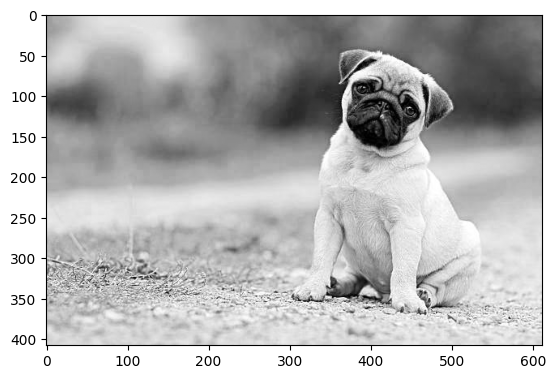

In [ ]:
plt.imshow(img[0, :, :], cmap = 'gray')

In [ ]:
weights = models.GoogLeNet_Weights.DEFAULT
model = models.googlenet(weights = weights)
model

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


100%|██████████| 49.7M/49.7M [00:00<00:00, 93.5MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
transform = weights.transforms()

In [ ]:
X = transform(img)

In [ ]:
model(X.unsqueeze(0)).argmax()

tensor(731)

In [ ]:
weights.meta['categories'][731]

'plunger'